# Assembling Cap'n Kunkka and testing it<br>
# Srikumar Muralidharan <br>

<b> Part 1 : Mechanical and Electrical Assembly </b> <br>
Well, i think its partly done, need to add the grippers on! <br>
Meet Cap'n Kunkka!! <br>

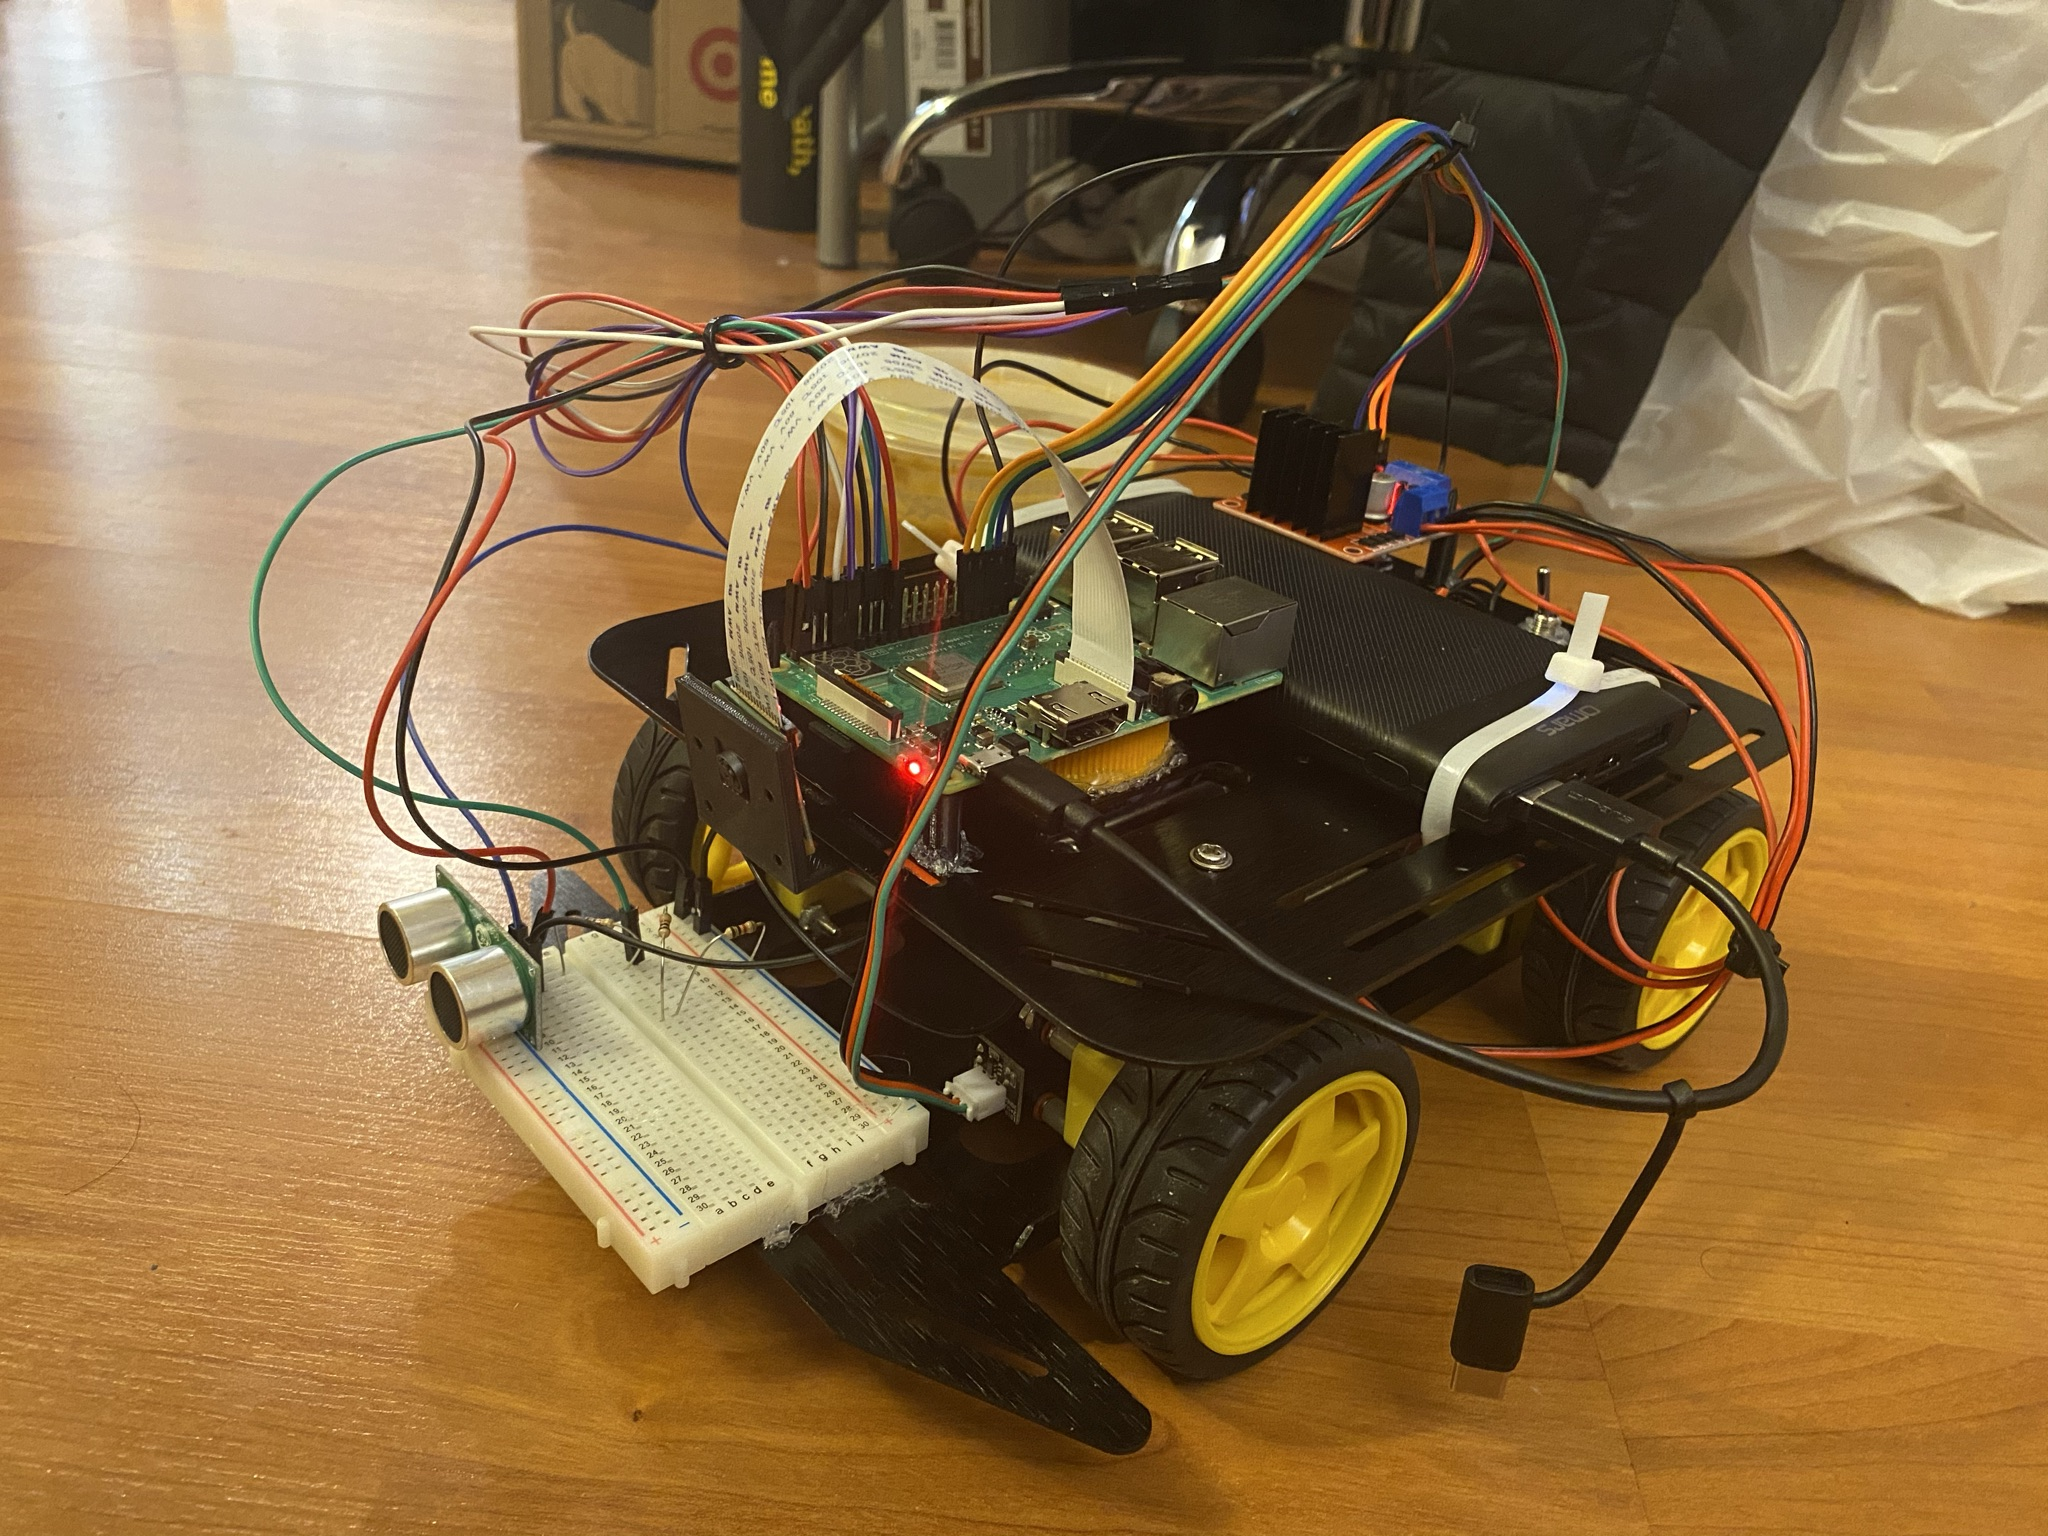

I have used something here to mount My RPi: a bottle cap! No wonder he's a Cap'n. Bad joke xD <br>
Also, i have used a couple of 3D printed parts to mount the RPi and also the motor driver. You can observe them in this image! <br>
I created a small 3D printed part for the camera mount as well.<br>
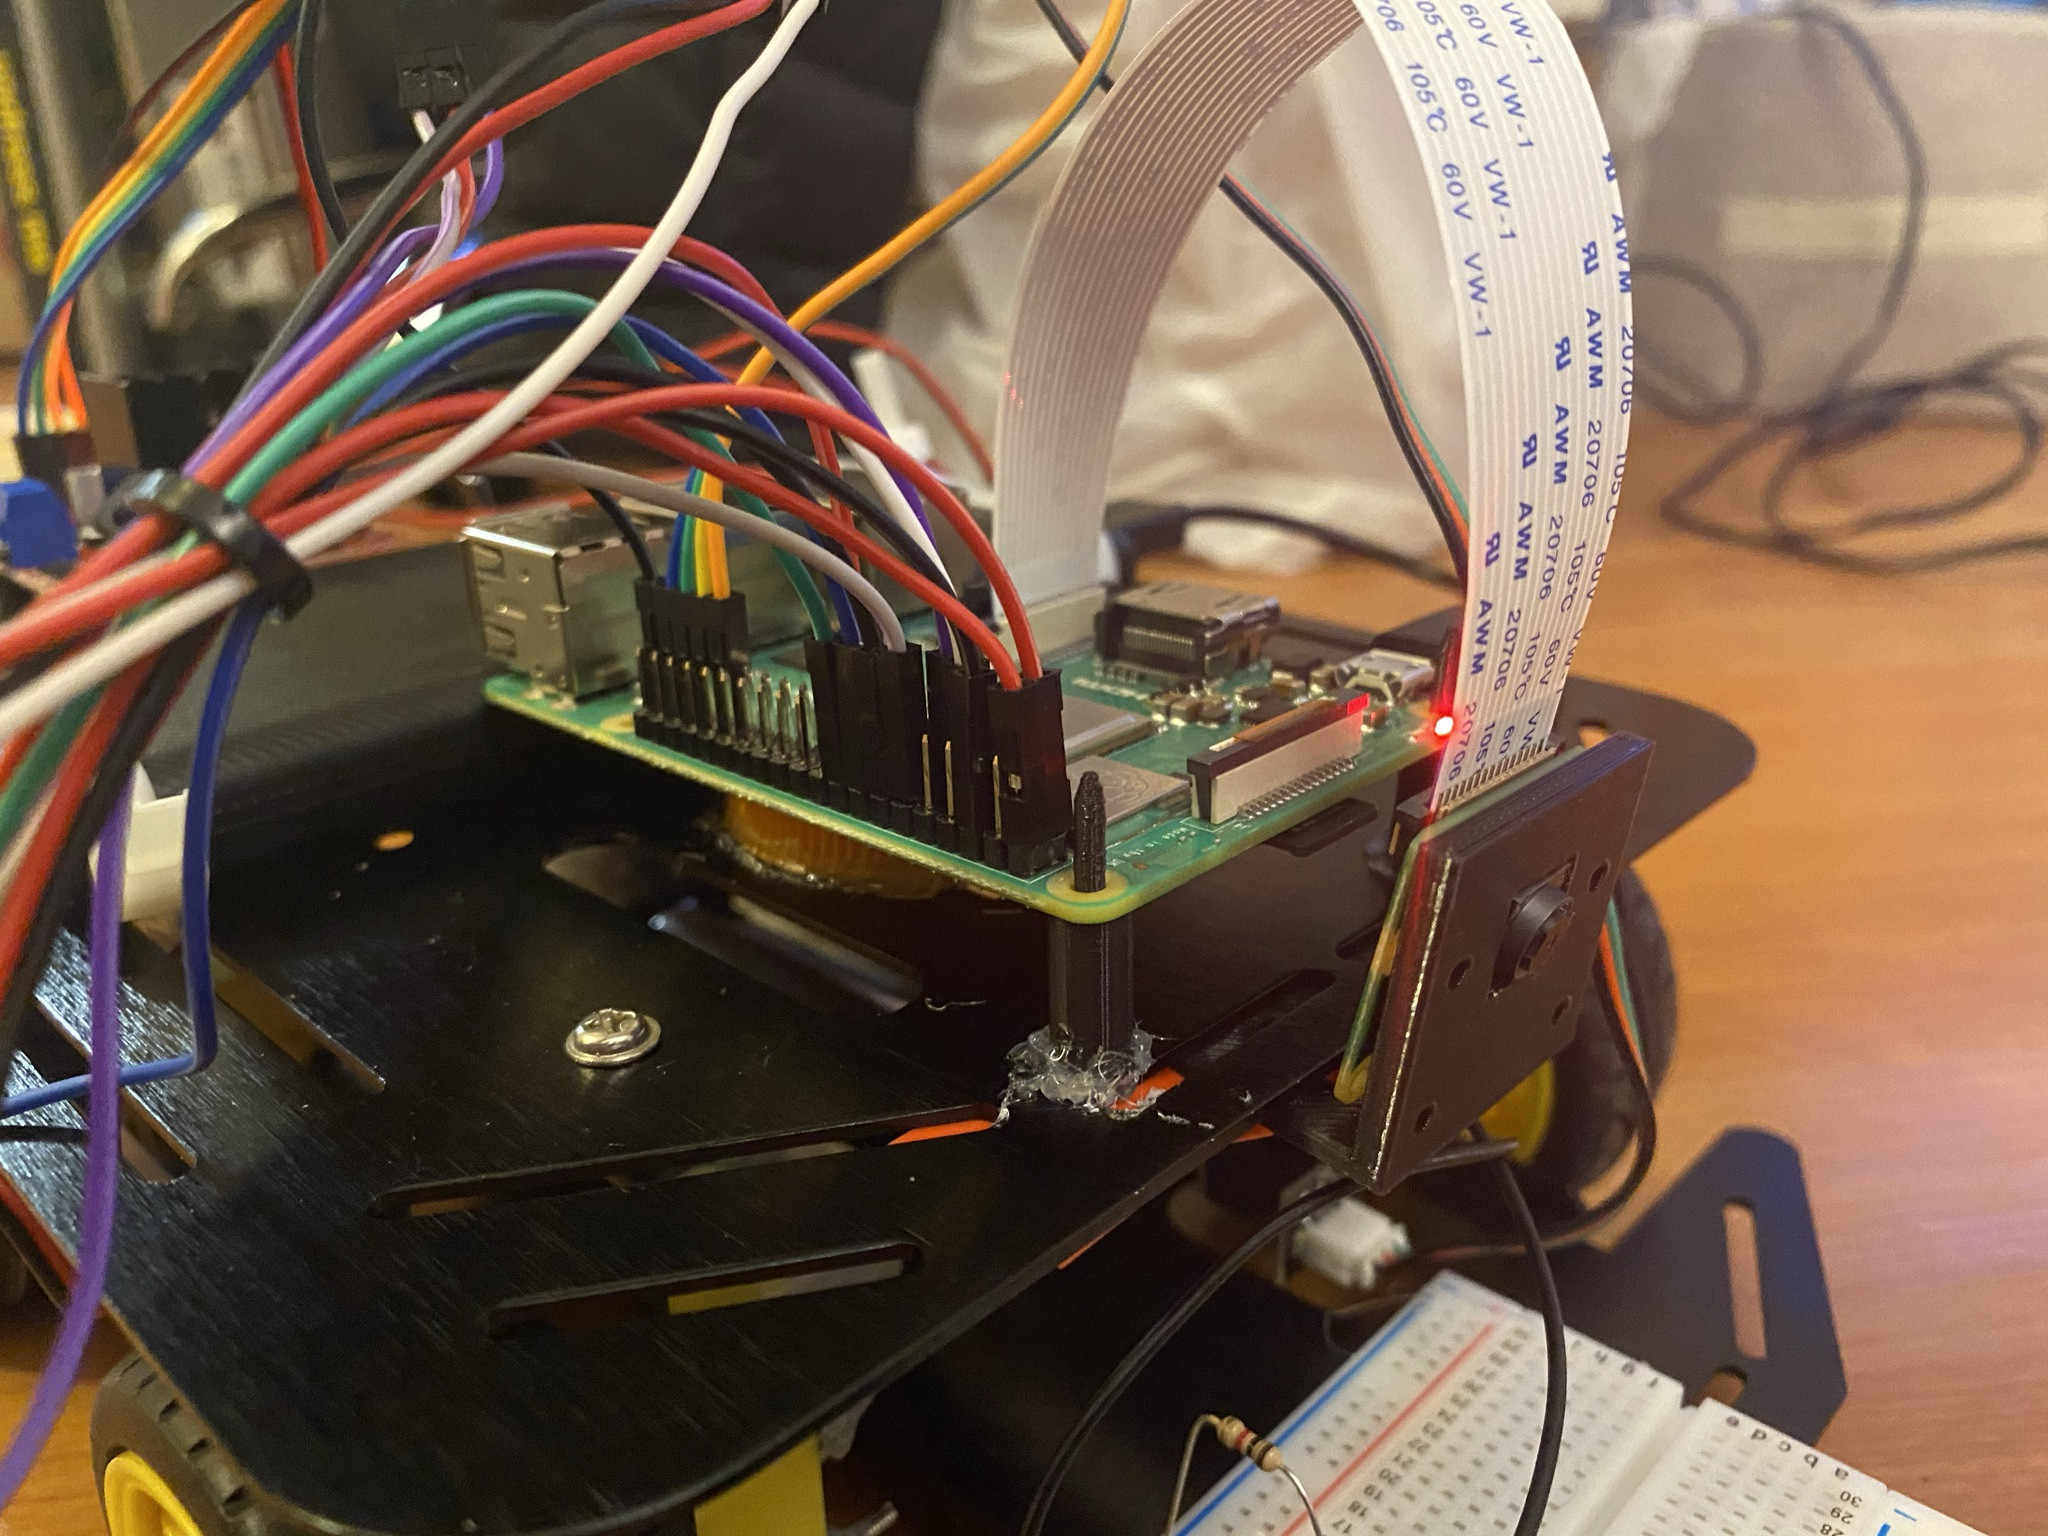

Motorcontrol python files are updated here. Also, i have sourced the openmotors.py code onto the .bashrc file in my RPi. The code used to run the robot based on movement feedback from the user is as follows!

In [ ]:
"""
RUN THIS CODE ON YOUR RPi
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 12 17:12:47 2021

@author: srikumar
"""

import RPi.GPIO as gpio
import time

def init():
    gpio.setmode(gpio.BOARD)
    gpio.setup(31,gpio.OUT)         #IN1
    gpio.setup(33,gpio.OUT)         #IN2
    gpio.setup(35,gpio.OUT)         #IN3
    gpio.setup(37,gpio.OUT)         #IN4
    
def gameover():
    #set all pins low
    gpio.output(31, False)
    gpio.output(33, False)
    gpio.output(35, False)
    gpio.output(37, False)
    
def forward(tf):
    init()
    # Left wheels
    gpio.output(31, True)
    gpio.output(33, False)
    # Right wheels
    gpio.output(35, False)
    gpio.output(37, True)
    # Wait
    time.sleep(tf)
    # Send all pins low and cleanup
    gameover()
    gpio.cleanup()
    
def reverse(tf):
    init()
    # Left wheels
    gpio.output(31, False)
    gpio.output(33, True)
    # Right wheels
    gpio.output(35, True)
    gpio.output(37, False)
    # Wait
    time.sleep(tf)
    # Send all pins low and cleanup
    gameover()
    gpio.cleanup()
    
def pivotleft(tf):
    init()
    # Left wheels
    gpio.output(31, False)
    gpio.output(33, True)
    # Right wheels
    gpio.output(35, False)
    gpio.output(37, True)
    # Wait
    time.sleep(tf)
    # Send all pins low and cleanup
    gameover()
    gpio.cleanup()
    
def pivotright(tf):
    init()
    # Left wheels
    gpio.output(31, True)
    gpio.output(33, False)
    # Right wheels
    gpio.output(35, True)
    gpio.output(37, False)
    # Wait
    time.sleep(tf)
    # Send all pins low and cleanup
    gameover()
    gpio.cleanup()

def key_input(event):
    init()
    print("Key: ", event)
    key_press = event
    tf=1
    
    if key_press.lower() == 'w':
        forward(tf)
    elif key_press.lower() == 'z':
        reverse(tf)
    elif key_press.lower() == 'a':
        pivotleft(tf)
    elif key_press.lower() == 's':
        pivotright(tf)
    else:
        print("Invalid key pressed!")

while True:
    key_press = input("Select driving mode: ")
    if key_press == 'p':
        break
    key_input(key_press)

Link to the youtube video for watching the robot movement! <br>
https://youtu.be/0nTQCJZbLUA